# Introduction to Deep Learning for Computer Vision

## Training a Convnet from scratch on a small dataset
1. Instantiating a small convnet for Hotdog - Not Hotdog classification

In [2]:
# import 
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
def build_model():
    inputs = keras.Input(shape=(224, 224, 3))
    x = layers.Rescaling(1./255)(inputs)
    x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
    x = layers.Flatten()(x)
    outputs = layers.Dense(units=1, activation='sigmoid')(x)
    
    model = keras.Model(inputs, outputs)
    return model

In [6]:
model = build_model()
model.summary()

Metal device set to: Apple M1 Pro


2022-03-23 21:45:39.606543: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-23 21:45:39.607029: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                         

In [30]:
# compile and train
def train_model(model, x, epochs, batch_size, validation_data, callbacks):
    model.compile(
        optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    hist = model.fit(x, epochs=epochs, batch_size=batch_size, validation_data=validation_data, callbacks=callbacks)
    return hist

2. **Data preprocessing**
- Read the picture files
- Decode the image content to RGB grids of pixels
- Convert it into floating-point tensors
- Resize them to a shared size (224, 224)
- Pack them into batches 

In [10]:
# import 
from tensorflow.keras.utils import image_dataset_from_directory

In [12]:
# filepath
TRAIN_PATH = '../../pyapp/seefood/dataset/train'
VALID_PATH = '../../pyapp/seefood/dataset/valid'
TEST_PATH = '../../pyapp/seefood/dataset/test'

In [13]:
train_dataset = image_dataset_from_directory(TRAIN_PATH, image_size=(224, 224), batch_size=32,)
valid_dataset = image_dataset_from_directory(VALID_PATH, image_size=(224, 224), batch_size=32,)
test_dataset = image_dataset_from_directory(TEST_PATH, image_size=(224, 224), batch_size=32,)

Found 574 files belonging to 2 classes.
Found 64 files belonging to 2 classes.
Found 360 files belonging to 2 classes.


In [17]:
# checking the shape of the inputs
for data_batch, labels_batch in train_dataset:
    print('data batch shape', data_batch.shape)
    print('labels batch shape', labels_batch.shape)
    break

data batch shape (32, 224, 224, 3)
labels batch shape (32,)


3.**Training the model**

In [34]:
# callbacks function
CALLBACKS = [
    keras.callbacks.ModelCheckpoint(filepath='convnet_from_scratch.keras', save_best_only=True, monitor='val_loss',),
]

In [35]:
EPOCHS = 20
BATCH_SIZE = 32

hist = train_model(model=model, 
                   x=train_dataset, 
                   epochs=EPOCHS, 
                   batch_size=BATCH_SIZE, 
                   validation_data=valid_dataset, 
                   callbacks=CALLBACKS)

Epoch 1/20


2022-03-23 22:16:29.306587: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 3s 124ms/step - loss: 0.5943 - accuracy: 0.7544 - val_loss: 0.6716 - val_accuracy: 0.6094


2022-03-23 22:16:31.749379: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/20
18/18 [==============================] - 2s 107ms/step - loss: 0.3378 - accuracy: 0.8676 - val_loss: 0.7845 - val_accuracy: 0.5781
Epoch 3/20
18/18 [==============================] - 2s 112ms/step - loss: 0.2643 - accuracy: 0.8815 - val_loss: 1.1390 - val_accuracy: 0.5938
Epoch 4/20
18/18 [==============================] - 2s 111ms/step - loss: 0.2993 - accuracy: 0.8728 - val_loss: 0.8734 - val_accuracy: 0.6250
Epoch 5/20
18/18 [==============================] - 2s 111ms/step - loss: 0.1446 - accuracy: 0.9495 - val_loss: 1.1049 - val_accuracy: 0.5938
Epoch 6/20
18/18 [==============================] - 2s 112ms/step - loss: 0.2371 - accuracy: 0.9181 - val_loss: 1.2296 - val_accuracy: 0.6094
Epoch 7/20
18/18 [==============================] - 2s 111ms/step - loss: 0.0695 - accuracy: 0.9826 - val_loss: 1.7158 - val_accuracy: 0.5312
Epoch 8/20
18/18 [==============================] - 2s 112ms/step - loss: 0.1029 - accuracy: 0.9617 - val_loss: 1.3854 - val_accuracy: 0.6250
Epoch 

In [42]:
# display graph
accuracy = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

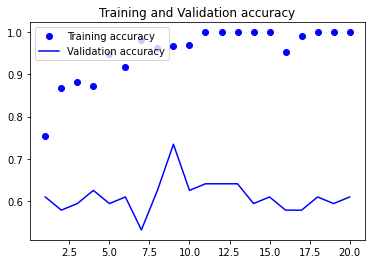

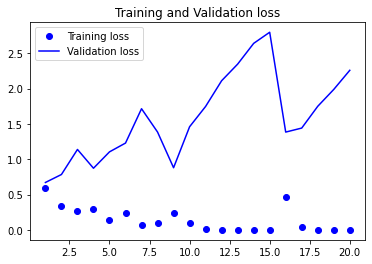

In [53]:
# import
import matplotlib.pyplot as plt

epochs = range(1, len(loss)+1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc='upper left')
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

Model is overfitting. The training accuracy increases overtime, and reach nearly 100%, whereas the validation accuracy peaks at 73%

In [55]:
# load best model
test_model = keras.models.load_model('convnet_from_scratch.keras')

In [56]:
# evaluate and predict
test_loss, test_acc = test_model.evaluate(test_dataset)

2022-03-23 22:29:56.982668: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 1s 51ms/step - loss: 0.8137 - accuracy: 0.5944


In [62]:
print(f'Test loss: {round(test_loss, 2)}, Test accuracy: {round(test_acc, 2)}')

Test loss: 0.81, Test accuracy: 0.59


Because we only have a few dataset (around 1000) so to improve the test accuracy we could try image augmentation

## Data Augmentation

In [78]:
#import 
import tensorflow as tf

# work around for m1 mac 
# train with cpu
with tf.device('/cpu:0'):
    augmentation = keras.Sequential([
        layers.RandomFlip('horizontal'),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.2),
    ])

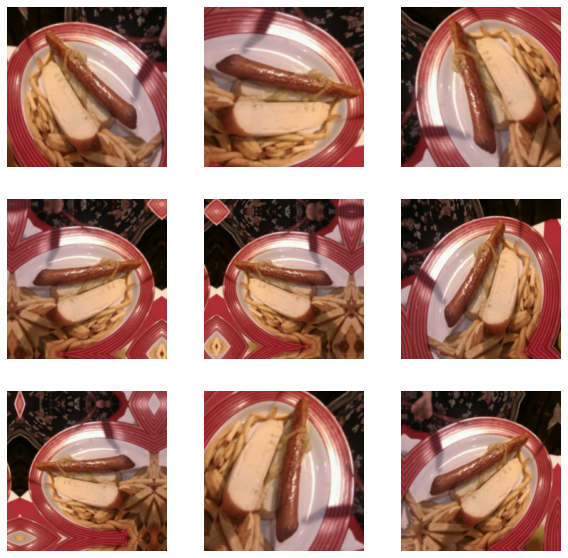

In [79]:
# preview data augmentation
plt.figure(figsize=(10, 10))
with tf.device('/cpu:0'):
    for images, labels in train_dataset.take(1):
        for i in range(9):
                augmented_images = augmentation(images)
                ax = plt.subplot(3, 3, i+1)
                plt.imshow(augmented_images[0].numpy().astype('uint8'))
                plt.axis('off')

In [89]:
# Train model with data augmentation
def build_model_augmentation():
    inputs = keras.Input(shape=(224, 224, 3))
    x = augmentation(inputs)
    x = layers.Rescaling(1./255)(x)
    x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
    x = layers.Flatten()(x)
    x = layers.Dropout(.5)(x)
    outputs = layers.Dense(units=1, activation='sigmoid')(x)
    
    model = keras.Model(inputs, outputs)
    return model

In [95]:
EPOCHS = 50

model_augmentation = build_model_augmentation()
hist = train_model(model_augmentation, train_dataset, EPOCHS, BATCH_SIZE, valid_dataset, CALLBACKS)

Epoch 1/50


2022-03-23 22:54:06.863364: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - ETA: 0s - loss: 0.8164 - accuracy: 0.4878

2022-03-23 22:54:10.602806: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 4s 158ms/step - loss: 0.8164 - accuracy: 0.4878 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/50
18/18 [==============================] - 3s 139ms/step - loss: 0.7016 - accuracy: 0.5209 - val_loss: 0.6920 - val_accuracy: 0.4844
Epoch 3/50
18/18 [==============================] - 3s 138ms/step - loss: 0.6970 - accuracy: 0.5017 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 4/50
18/18 [==============================] - 3s 139ms/step - loss: 0.6947 - accuracy: 0.5244 - val_loss: 0.6922 - val_accuracy: 0.5938
Epoch 5/50
18/18 [==============================] - 3s 139ms/step - loss: 0.6904 - accuracy: 0.5401 - val_loss: 0.6928 - val_accuracy: 0.4844
Epoch 6/50
18/18 [==============================] - 3s 138ms/step - loss: 0.6883 - accuracy: 0.5383 - val_loss: 0.6915 - val_accuracy: 0.4844
Epoch 7/50
18/18 [==============================] - 3s 137ms/step - loss: 0.7038 - accuracy: 0.5401 - val_loss: 0.6910 - val_accuracy: 0.5312
Epoch 8/50
18/18 

In [98]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

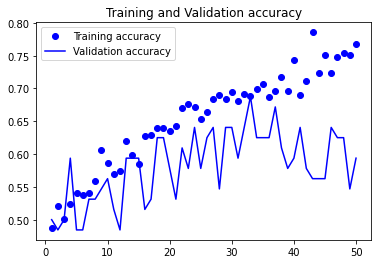

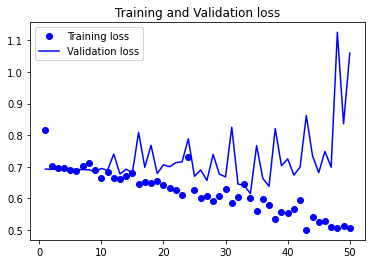

In [100]:
loss, acc, val_loss, val_acc = hist.history.values()

epochs = range(1, len(loss)+1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc='upper left')
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [104]:
# evaluate and predict
best_model = keras.models.load_model('convnet_from_scratch.keras')
test_loss, test_acc = best_model.evaluate(test_dataset)

2022-03-23 22:59:19.722126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 1s 36ms/step - loss: 0.6016 - accuracy: 0.6833
